In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train/combined_data.csv')
data

,accelerometer_mean,accelerometer_mean_abs_dev,accelerometer_median,accelerometer_median_abs_dev,accelerometer_neg_count,accelerometer_pos_count,accelerometer_over_mean_count,accelerometer_num_peaks,accelerometer_energy,accelerometer_avg_accel,...,totalAcceleration_sum_fft_vals,class,mean_roll,mean_pitch,mean_yaw,mean_loudness,latitude,longitude,altitude,avg_speed
0,0.006449,0.004368,0.004372,0.002367,0,150,55,44,0.010397,0.101968,...,1501.799676,Home,0.019068,0.024733,1.100247,-144.593148,40.384837,-86.915463,160.099991,0.166377
1,0.006386,0.004479,0.003929,0.001880,0,150,51,43,0.010764,0.103751,...,1502.418842,Home,0.019185,0.024596,1.100067,-133.916111,40.384837,-86.915473,160.099991,0.017980
2,0.006214,0.004538,0.003421,0.001908,0,150,52,41,0.010542,0.102677,...,1499.070914,Home,0.019413,0.024274,1.099534,-131.561944,40.384839,-86.915478,160.099991,0.012149
3,0.005999,0.004342,0.003527,0.001944,0,150,50,40,0.009767,0.098826,...,1501.381485,Home,0.019428,0.024050,1.098634,-139.501759,40.384852,-86.915480,160.099991,0.027908
4,0.005879,0.004240,0.003777,0.001977,0,150,48,41,0.009715,0.098566,...,1501.543784,Home,0.019343,0.023987,1.097990,-134.945000,40.384855,-86.915481,160.099991,0.024495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.196770,0.139970,0.134229,0.079925,0,150,53,42,10.959994,3.310588,...,1586.506048,Drive,-0.021712,0.018651,0.944217,-22.696481,40.403319,-86.920427,159.399994,16.908133
107,0.006632,0.005192,0.003583,0.002007,0,150,51,41,0.012162,0.110280,...,1504.446476,Classroom,0.002867,0.023064,2.437325,-97.688981,40.427983,-86.911015,149.399994,0.054280
108,0.006969,0.005301,0.003643,0.002074,0,150,56,37,0.012556,0.112054,...,1504.057981,Classroom,0.001074,0.025703,2.450282,-101.085463,40.427989,-86.911012,149.399994,0.029892
109,0.006554,0.004623,0.003839,0.002348,0,150,54,36,0.011139,0.105543,...,1503.680224,Classroom,0.000262,0.027192,2.446066,-103.619167,40.427989,-86.911012,149.399994,0.034508


In [3]:
#from sklearn.preprocessing import LabelEncoder
#LE = LabelEncoder()
class_mappings = {'Campus': 0, 'Classroom': 1, 'Drive': 2, 'Garage': 3, 'Home': 4}
test_data = pd.read_csv('data/test/combined_test.csv')
test_data['class'] = test_data['class'].map(class_mappings)
data['class'] = data['class'].map(class_mappings)

d:\Anaconda\envs\MDL2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


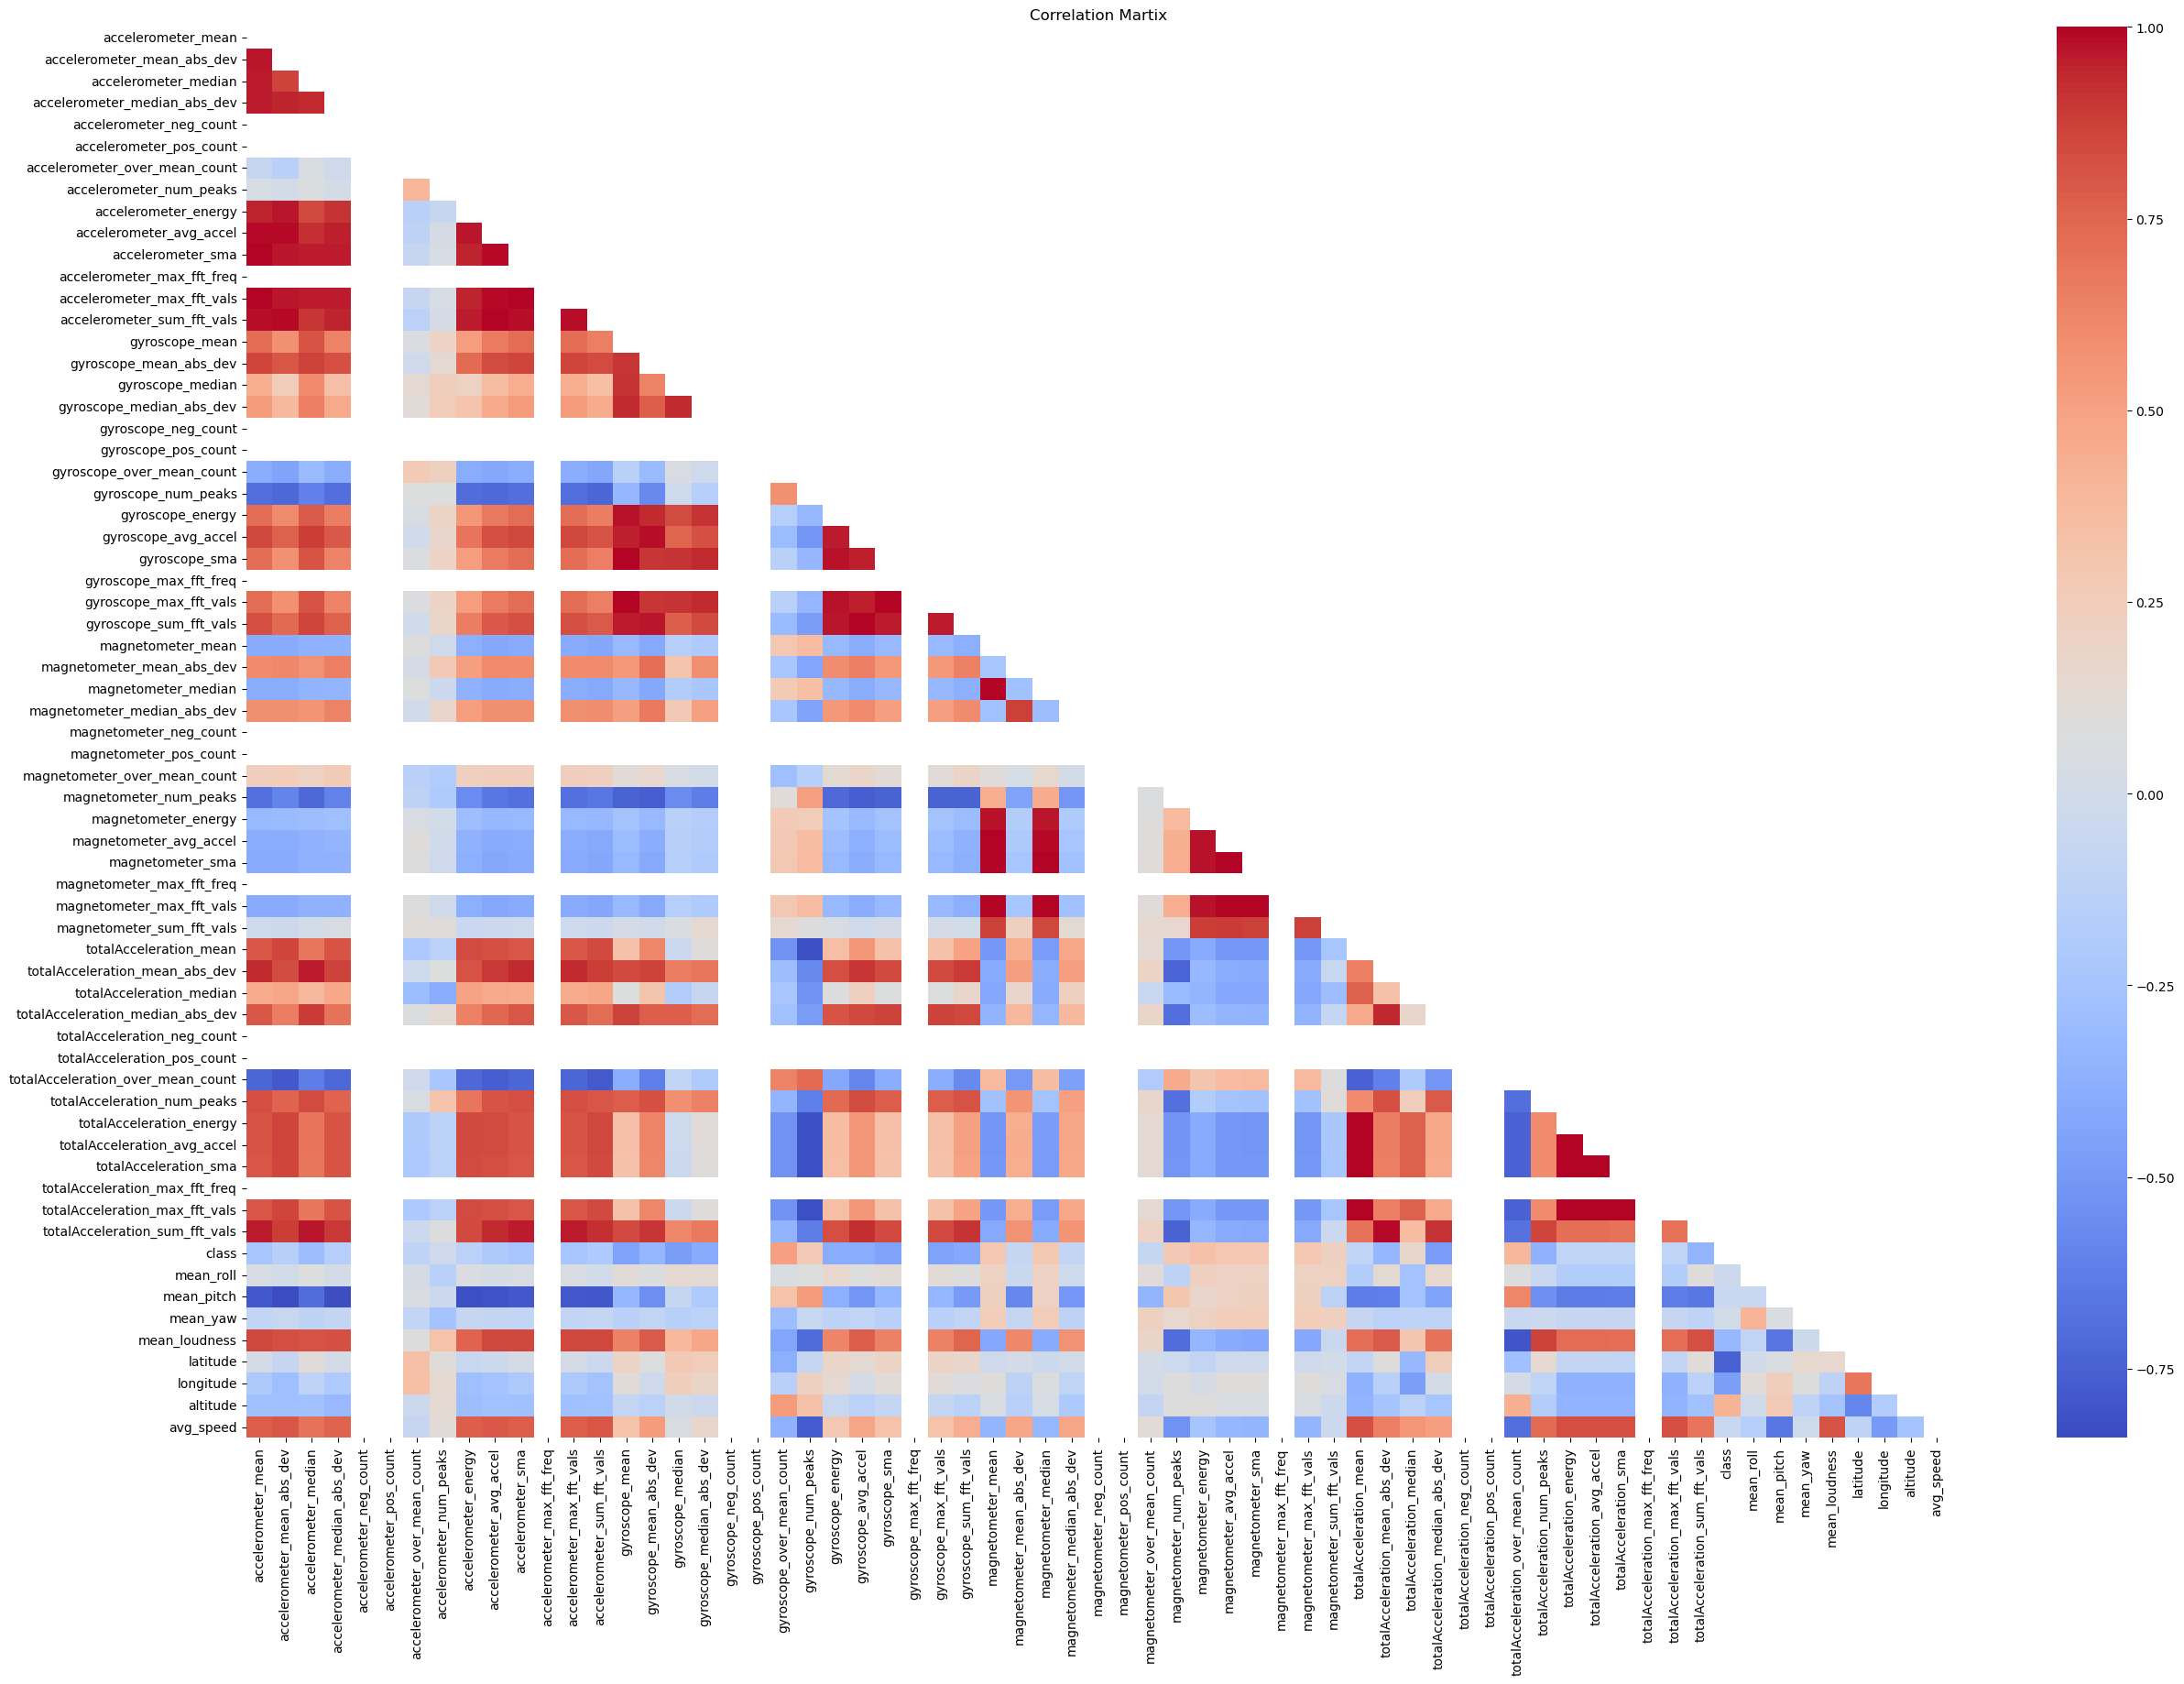

In [4]:
# correlation matrix for feature selection
c = data.corr()
mask = np.triu(np.ones_like(c, dtype=bool))

plt.figure(figsize=(30, 20))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Martix')
plt.show()

In [5]:
print(data['class'].value_counts())
print('Shape: ', data.shape)
print('We need', data.shape[0] * 20/100, 'datapoints for an 80/20 split')
print('We need', data.shape[0] * 30/100, 'datapoints for an 70/30 split')
print('For an evenly balanced test set, we need', round((data.shape[0] * 20/100) / 5, 2), 'or', round((data.shape[0] * 30/100) / 5, 2), 'datapoints per class')

class
4    33
1    29
2    28
3    13
0     8
Name: count, dtype: int64
Shape:  (111, 65)
We need 22.2 datapoints for an 80/20 split
We need 33.3 datapoints for an 70/30 split
For an evenly balanced test set, we need 4.44 or 6.66 datapoints per class


In [6]:
Y = data[['class']]
X = data.drop(['class'], axis=1)

In [7]:
X

,accelerometer_mean,accelerometer_mean_abs_dev,accelerometer_median,accelerometer_median_abs_dev,accelerometer_neg_count,accelerometer_pos_count,accelerometer_over_mean_count,accelerometer_num_peaks,accelerometer_energy,accelerometer_avg_accel,...,totalAcceleration_max_fft_vals,totalAcceleration_sum_fft_vals,mean_roll,mean_pitch,mean_yaw,mean_loudness,latitude,longitude,altitude,avg_speed
0,0.006449,0.004368,0.004372,0.002367,0,150,55,44,0.010397,0.101968,...,1488.304150,1501.799676,0.019068,0.024733,1.100247,-144.593148,40.384837,-86.915463,160.099991,0.166377
1,0.006386,0.004479,0.003929,0.001880,0,150,51,43,0.010764,0.103751,...,1488.664085,1502.418842,0.019185,0.024596,1.100067,-133.916111,40.384837,-86.915473,160.099991,0.017980
2,0.006214,0.004538,0.003421,0.001908,0,150,52,41,0.010542,0.102677,...,1488.917399,1499.070914,0.019413,0.024274,1.099534,-131.561944,40.384839,-86.915478,160.099991,0.012149
3,0.005999,0.004342,0.003527,0.001944,0,150,50,40,0.009767,0.098826,...,1488.964317,1501.381485,0.019428,0.024050,1.098634,-139.501759,40.384852,-86.915480,160.099991,0.027908
4,0.005879,0.004240,0.003777,0.001977,0,150,48,41,0.009715,0.098566,...,1488.966348,1501.543784,0.019343,0.023987,1.097990,-134.945000,40.384855,-86.915481,160.099991,0.024495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.196770,0.139970,0.134229,0.079925,0,150,53,42,10.959994,3.310588,...,1497.930322,1586.506048,-0.021712,0.018651,0.944217,-22.696481,40.403319,-86.920427,159.399994,16.908133
107,0.006632,0.005192,0.003583,0.002007,0,150,51,41,0.012162,0.110280,...,1490.328768,1504.446476,0.002867,0.023064,2.437325,-97.688981,40.427983,-86.911015,149.399994,0.054280
108,0.006969,0.005301,0.003643,0.002074,0,150,56,37,0.012556,0.112054,...,1490.875019,1504.057981,0.001074,0.025703,2.450282,-101.085463,40.427989,-86.911012,149.399994,0.029892
109,0.006554,0.004623,0.003839,0.002348,0,150,54,36,0.011139,0.105543,...,1490.797552,1503.680224,0.000262,0.027192,2.446066,-103.619167,40.427989,-86.911012,149.399994,0.034508


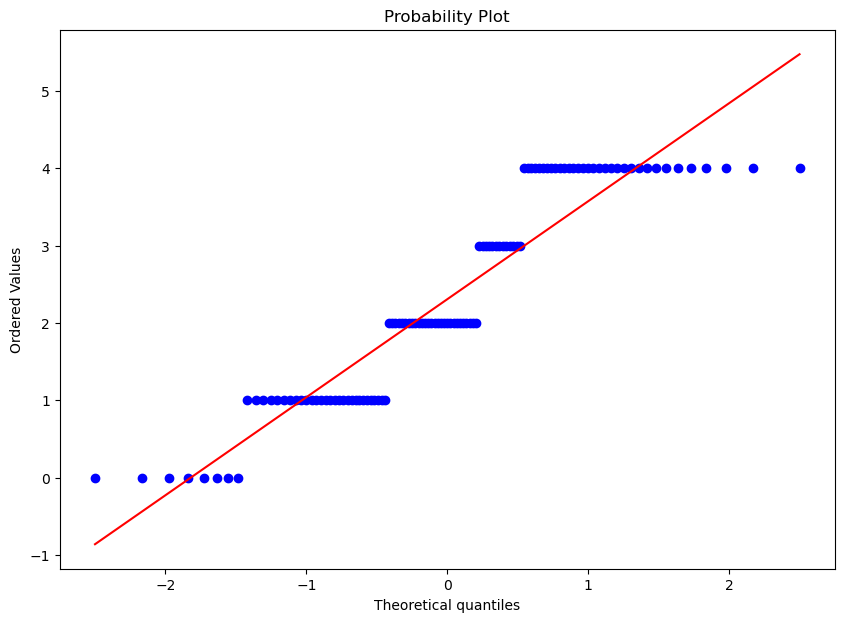

In [8]:
# No need for this since we know the problem is classification but would be nice to know what it looks like
from scipy.stats import probplot
plt.figure(figsize=(10,7))
probplot(data['class'], plot=plt)
plt.show()

In [9]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import RFE
from operator import itemgetter

def check_features(data, threshold):
    t = VarianceThreshold(threshold=threshold)
    t.fit(data)
    features = t.get_support(indices=True)
    return features

def find_outliers(data, estimators, contamination):
    ifa = IsolationForest(n_estimators=estimators, contamination=contamination)
    ifa_p = ifa.fit_predict(X.values)
    outlier_scores = ifa.decision_function(X.values)
    plt.scatter(range(len(X)), outlier_scores, c=np.where(outlier_scores < 0, 'red', 'green'))
    plt.show()

def recursive_selection(x, y, estimators, depth, n_features):
    clf = RandomForestClassifier(n_estimators=estimators, max_depth=depth)
    extractor = RFE(clf, n_features_to_select=n_features)
    extractor.fit(x, y.values.ravel())
    features = x.columns.to_list()
    for a, b in (sorted(zip(extractor.ranking_, features), key=itemgetter(0))):
        print(a,b)

def feature_importances(x,y):
    X_train_L, X_test_L, Y_train_L, Y_test_L = [], [], [], []
    for c in Y['class'].unique():
        indices = Y.index[Y['class'] == c]
        test_indices = np.random.choice(indices, size=6, replace=False)
        train_indices = [idx for idx in indices if idx not in test_indices]
        X_train_L.append(X.loc[train_indices])
        X_test_L.append(X.loc[test_indices])
        Y_train_L.append(Y.loc[train_indices])
        Y_test_L.append(Y.loc[test_indices])

    X_train = pd.concat(X_train_L)
    X_test = pd.concat(X_test_L)
    Y_train = pd.concat(Y_train_L)
    Y_test = pd.concat(Y_test_L)

    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train)
    importances = clf.feature_importances_
    importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    return importance_df

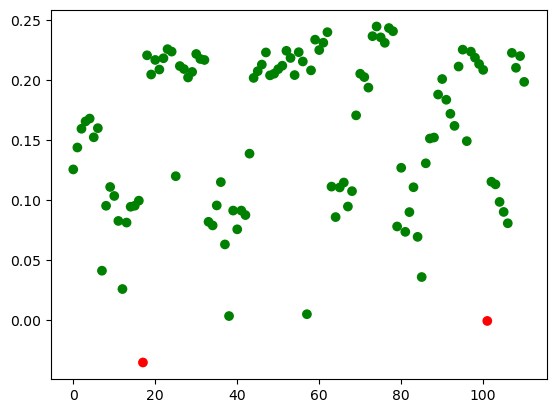

In [10]:
find_outliers(X, 150, 0.01)

In [11]:
#recursive_selection(X, Y, 150, 5, 20)

In [12]:
from lazypredict.Supervised import LazyClassifier

def lazy_predict(x,y):
    X_train_L, X_test_L, Y_train_L, Y_test_L = [], [], [], []
    for c in Y['class'].unique():
        indices = Y.index[Y['class'] == c]
        test_indices = np.random.choice(indices, size=6, replace=False)
        train_indices = [idx for idx in indices if idx not in test_indices]
        X_train_L.append(X.loc[train_indices])
        X_test_L.append(X.loc[test_indices])
        Y_train_L.append(Y.loc[train_indices])
        Y_test_L.append(Y.loc[test_indices])

    X_train = pd.concat(X_train_L)
    X_test = pd.concat(X_test_L)
    Y_train = pd.concat(Y_train_L)
    Y_test = pd.concat(Y_test_L)

    print('Shapes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, Y_train.values.ravel(), Y_test.values.ravel())
    return models, predictions

In [13]:
models, predictions = lazy_predict(X,Y)

Shapes: (81, 64) (30, 64) (81, 1) (30, 1)


 86%|████████▌ | 25/29 [00:00<00:00, 36.55it/s]  File "d:\Anaconda\envs\MDL2\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
100%|██████████| 29/29 [00:01<00:00, 27.95it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1400
[LightGBM] [Info] Number of data points in the train set: 81, number of used features: 52
[LightGBM] [Info] Start training from score -3.701302
[LightGBM] [Info] Start training from score -1.258955
[LightGBM] [Info] Start training from score -1.303407
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [14]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.93,0.93,None,0.93,0.02
LogisticRegression,0.93,0.93,None,0.93,0.02
SGDClassifier,0.93,0.93,None,0.93,0.01
Perceptron,0.93,0.93,None,0.93,0.01
PassiveAggressiveClassifier,0.93,0.93,None,0.93,0.01
SVC,0.90,0.90,None,0.89,0.01
RidgeClassifierCV,0.90,0.90,None,0.89,0.01
RidgeClassifier,0.90,0.90,None,0.89,0.01
RandomForestClassifier,0.90,0.90,None,0.89,0.13


More tests

Lets try looking at relevant variables.

In [15]:
importance = feature_importances(X,Y)
importance

,Features,Importance
60,latitude,0.12
45,totalAcceleration_median_abs_dev,0.06
27,gyroscope_sum_fft_vals,0.05
59,mean_loudness,0.04
48,totalAcceleration_over_mean_count,0.04
...,...,...
47,totalAcceleration_pos_count,0.00
46,totalAcceleration_neg_count,0.00
18,gyroscope_neg_count,0.00
39,magnetometer_max_fft_freq,0.00


In [16]:
def custom_split(X,Y,size):
    X_train_L, X_test_L, Y_train_L, Y_test_L = [], [], [], []
    for c in Y['class'].unique():
        indices = Y.index[Y['class'] == c]
        test_indices = np.random.choice(indices, size=size, replace=False)
        train_indices = [idx for idx in indices if idx not in test_indices]
        X_train_L.append(X.loc[train_indices])
        X_test_L.append(X.loc[test_indices])
        Y_train_L.append(Y.loc[train_indices])
        Y_test_L.append(Y.loc[test_indices])

    X_train = pd.concat(X_train_L)
    X_test = pd.concat(X_test_L)
    Y_train = pd.concat(Y_train_L)
    Y_test = pd.concat(Y_test_L)

    return X_train, X_test, Y_train, Y_test

In [25]:
# try another model after selecting features
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

features = importance['Features'][:30] # 30 features
#X_train, X_test, Y_train, Y_test = custom_split(X[features], Y, 6)
X_train, Y_train = X[features], Y
X_test, Y_test = test_data[features], test_data['class']

X_Ntest = X_test.copy()
#Y_testOG = Y_test.copy()
noise = np.random.normal(loc=0, scale=0.02, size=X_Ntest.shape)
X_Ntest += noise

LR_pipeline = make_pipeline(RobustScaler(), LogisticRegression())

LR_pipeline.fit(X_train, Y_train)
y_predLR = LR_pipeline.predict(X_Ntest)
print(classification_report(Y_test, y_predLR))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           2       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         0

    accuracy                           0.71         7
   macro avg       0.67      0.50      0.56         7
weighted avg       1.00      0.71      0.81         7



Increase from 14% to 71% on a Logistic Regression model on completely unseen data. This is not too bad.
We likely got a low accuracy due to mislabelled classes because of the Label Encoder.

Adding noise drops accuracy to 29%.

In [18]:
from sklearn.linear_model import RidgeClassifier

Ridge_pipeline = make_pipeline(RobustScaler(), RidgeClassifier())
Ridge_pipeline.fit(X_train, Y_train)
y_predRidge = Ridge_pipeline.predict(X_Ntest)
print(classification_report(Y_test, y_predRidge))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.67      0.58      0.62         7
weighted avg       1.00      0.86      0.92         7



Overfit here - accuracy is at 100% on unseen data.

In [26]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_pipeline = make_pipeline(RobustScaler(), PassiveAggressiveClassifier(C=0.5))
pa_pipeline.fit(X_train, Y_train)
y_predPassiveAggressive = pa_pipeline.predict(X_Ntest)
print(classification_report(Y_test, y_predPassiveAggressive))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.67      0.58      0.62         7
weighted avg       1.00      0.86      0.92         7



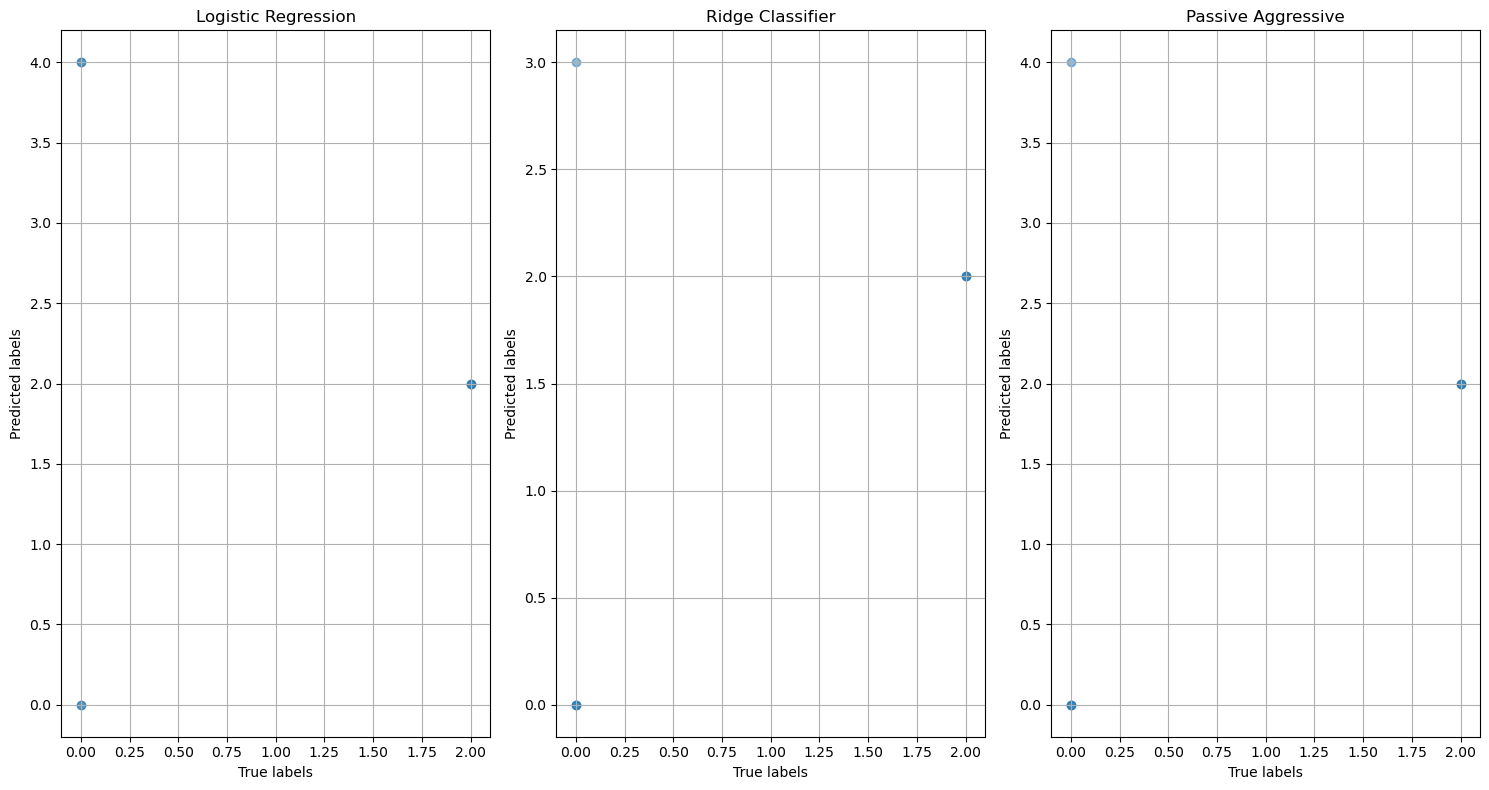

In [28]:
# classification plots
fig, axs = plt.subplots(1,3, figsize=(15,8))

for i, (predictions, model) in enumerate(zip([y_predLR, y_predRidge, y_predPassiveAggressive], ['Logistic Regression', 'Ridge Classifier', 'Passive Aggressive'])):
    ax = axs[i]
    ax.scatter(Y_test, predictions, alpha=0.5)
    ax.set_title(model)
    ax.set_xlabel('True labels')
    ax.set_ylabel('Predicted labels')
    ax.grid(True)

plt.tight_layout()
plt.show()